<a href="https://colab.research.google.com/github/felixlys/Trial_BlackScholes/blob/main/BlackScholes_dan_Weather_Derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#By Antoni Smolski
#https://antonismolski.medium.com/implementation-of-black-scholes-formula-using-finite-difference-method-with-code-965fd0539808
def BlackScholes(vol, int_rate, p_type, q_type, strike, expiration, NAS, NTS):
    S = np.zeros(NAS+1)
    dS = 2 * strike / NAS
    dt = 0.9 / vol**2 / NAS**2
    NTS = int(expiration / dt) + 1
    dt = expiration / NTS
    V = np.zeros((NAS+1, NTS+1))
    q = 1
    if p_type == "put":
        q = -1
    for i in range(NAS+1):
        S[i] = i * dS
        V[i, 0] = max(q * (S[i] - strike), 0)
    payoff_values = np.maximum(q * (S - strike), 0)
    V[:, 0] = payoff_values

    for k in range(1, NTS+1):
        for i in range(1, NAS):
            delta = (V[i+1, k-1] - V[i-1, k-1]) / (2 * dS)
            gamma = (V[i+1, k-1] - 2 * V[i, k-1] + V[i-1, k-1]) / (dS * dS)
            theta = -0.5 * vol**2 * S[i]**2 * gamma - int_rate * S[i] * delta + int_rate * V[i, k-1]
            V[i, k] = V[i, k-1] - dt * theta

        V[0, k] = V[0, k-1] * (1 - int_rate * dt)
        V[NAS, k] = 2 * V[NAS-1, k] - V[NAS-2, k]

    if q_type == "American":
        for k in range(1, NTS+1):
            for i in range(1, NAS):
                discounted_payoff = payoff_values[i] * np.exp(-int_rate * k * dt)
                V[i, k] = np.maximum(V[i, k], discounted_payoff)

    return S,V,dt

vol = 0.2
int_rate = 0.05
p_type = "put"
q_type = "European"
strike = 50
expiration = 1
NAS = 1000
NTS = 1000

In [ ]:
vol = 0.2
int_rate = 0.05
p_type = "put"
q_type = "European"
strike = 50
expiration = 1
NAS = 1000
NTS = 1000

# Hitung harga opsi
S, V, dt = BlackScholes(vol, int_rate, p_type, q_type, strike, expiration, NAS, NTS)


[[ 5.00000000e+01  4.99999438e+01  4.99998875e+01 ...  4.75615769e+01
   4.75615234e+01  4.75614699e+01]
 [ 4.99000000e+01  4.98999438e+01  4.98998875e+01 ...  4.74615769e+01
   4.74615234e+01  4.74614699e+01]
 [ 4.98000000e+01  4.97999438e+01  4.97998875e+01 ...  4.73615769e+01
   4.73615234e+01  4.73614699e+01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.75446304e-05
  -7.75594255e-05 -7.75742229e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.27434190e-05
  -9.27603960e-05 -9.27773754e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.07942208e-04
  -1.07961366e-04 -1.07980528e-04]]


In [ ]:
S = np.linspace(0, 2 * strike, NAS+1)
plt.plot(S, V[:, -1])
plt.xlabel('Harga Saham')
plt.ylabel('Nilai Opsi')
plt.title(f'{p_type.capitalize()} Option Value at t=0')
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

Text(0.5, 0, 'Nilai opsi')

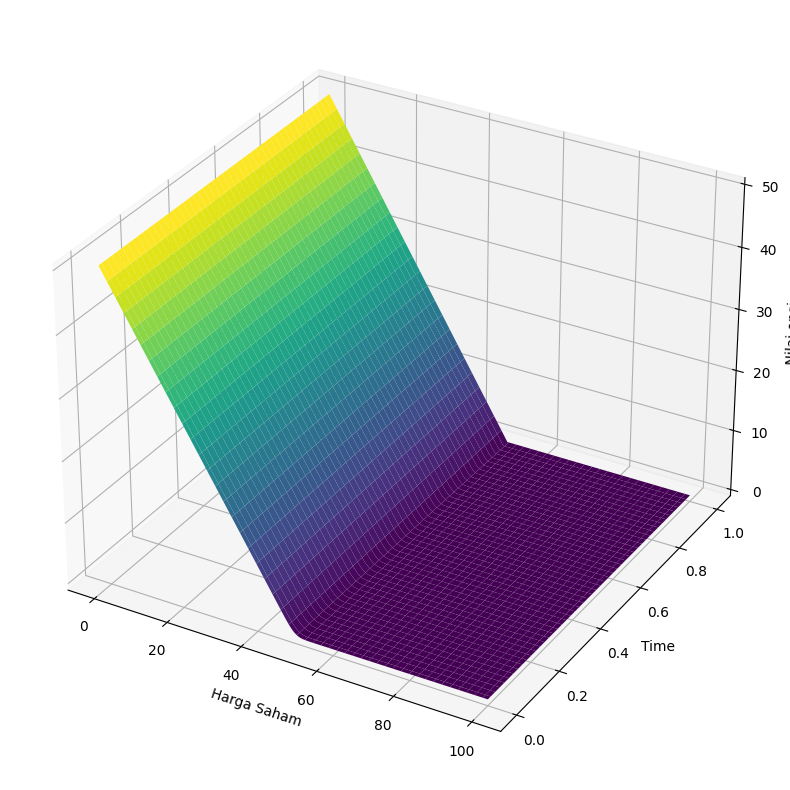

In [ ]:
t = np.linspace(0, expiration, NTS + 1)[::-1]

# Buat meshgrid untuk plotting 3D
T, S_grid = np.meshgrid(t, S)

# Plotting 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface( S_grid,T, V[:,:1001], cmap='viridis')
ax.set_xlabel('Harga Saham')
ax.set_ylabel('Time')
ax.set_zlabel('Nilai opsi')

Text(0.5, 0, 'Nilai opsi')

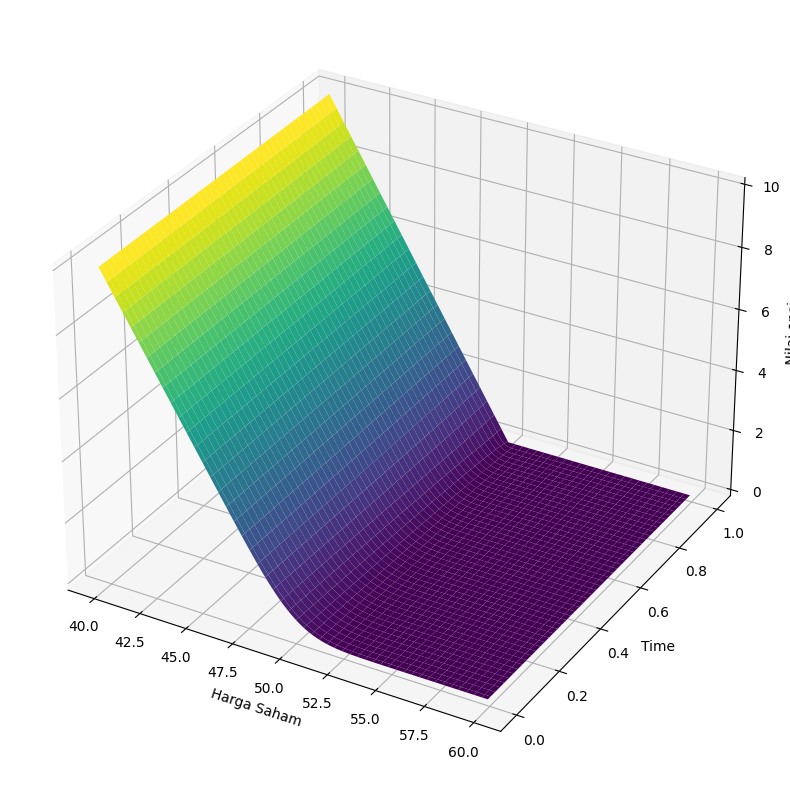

In [ ]:
t = np.linspace(0, expiration, NTS + 1)[::-1]

# Buat meshgrid untuk plotting 3D
T, S_grid = np.meshgrid(t, S)

# Plotting 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface( S_grid[400:600],T[400:600], V[400:600,:1001], cmap='viridis')
ax.set_xlabel('Harga Saham')
ax.set_ylabel('Time')
ax.set_zlabel('Nilai opsi')

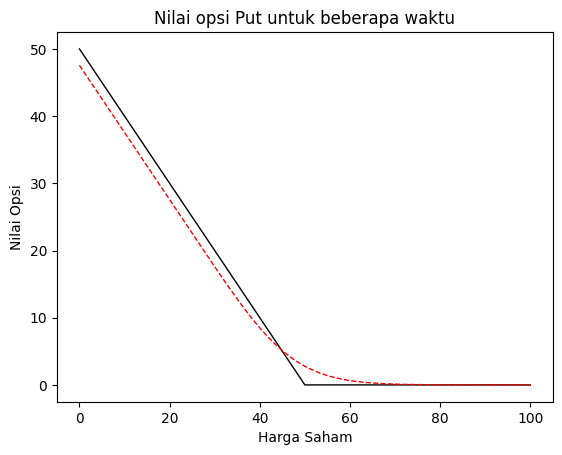

In [ ]:
S = np.linspace(0, 2 * strike, NAS+1)
plt.plot(S,V[:,0],color='black',linewidth=1,linestyle='-',label='Payoff')
plt.plot(S, V[:, -1], color='red', linewidth=1,linestyle='dashed',label='Valuasi')
plt.xlabel('Harga Saham')
plt.ylabel('Nilai Opsi')
plt.title(f'Nilai opsi {p_type.capitalize()} untuk beberapa waktu')
plt.show()

[[ 5.00000000e+01  4.99999438e+01  4.99998875e+01 ...  4.75615769e+01
   4.75615234e+01  4.75614699e+01]
 [ 4.99000000e+01  4.98999438e+01  4.98998875e+01 ...  4.74615769e+01
   4.74615234e+01  4.74614699e+01]
 [ 4.98000000e+01  4.97999438e+01  4.97998875e+01 ...  4.73615769e+01
   4.73615234e+01  4.73614699e+01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.75446304e-05
  -7.75594255e-05 -7.75742229e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.27434190e-05
  -9.27603960e-05 -9.27773754e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.07942208e-04
  -1.07961366e-04 -1.07980528e-04]]
(1001, 44446)


In [ ]:
vol = 0.2
int_rate = 0.05
p_type = "call"
q_type = "European"
strike = 50
expiration = 1
NAS = 1000
NTS = 1000

# Hitung harga opsi
S, V, dt = BlackScholes(vol, int_rate, p_type, q_type, strike, expiration, NAS, NTS)

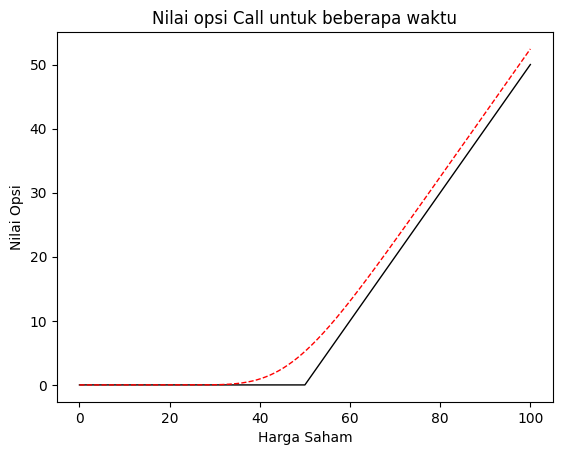

In [ ]:
S = np.linspace(0, 2 * strike, NAS+1)
plt.plot(S,V[:,0],color='black',linewidth=1,linestyle='-',label='Payoff')
plt.plot(S, V[:, -1], color='red', linewidth=1,linestyle='dashed',label='Valuasi')
plt.xlabel('Harga Saham')
plt.ylabel('Nilai Opsi')
plt.title(f'Nilai opsi {p_type.capitalize()} untuk beberapa waktu')
plt.show()

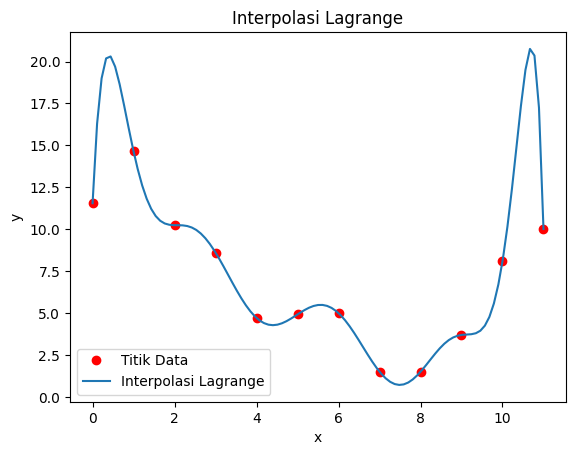

[11.554847009999998, 16.29148828892672, 18.994238312222983, 20.18699621163254, 20.303939454057797, 19.698098731305503, 18.650133651165657, 17.377086455470806, 16.040930734465025, 14.756767894939467, 13.60055619901325, 12.61628574207902, 11.822537997269219, 11.218390728882696, 10.788648371657754, 10.508394583764272, 10.346877800161504, 10.27075242483969, 10.246707984810602, 10.243526298974325, 10.233612658677846, 10.19405133546594, 10.107238580846913, 9.961147812558794, 9.74928203559582, 9.470367861975724, 9.127843902796702, 8.72919393551637, 8.28517221861421, 7.808964748973087, 7.31532624259796, 6.819728268907947, 6.3375493790883, 5.88333333023008, 5.470136703643569, 5.108982426297783, 4.808431001369626, 4.57427670400472, 4.409371662285021, 4.3135766758204035, 4.283833874150357, 4.3143529271432275, 4.396899526763656, 4.5211722949597455, 4.675252161081595, 4.8461066133284545, 5.020130075445694, 5.183700999532644, 5.323736099721892, 5.428222475058602, 5.486709172619685, 5.490741007307206

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_interp):

    n = len(x)
    result = 0.0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term = term * (x_interp - x[j]) / (x[i] - x[j])
        result += term
    return result

# Contoh data
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
y = np.array([11.55484701, 14.64550083, 10.24544191, 8.612079077,4.715387313, 4.925640068, 5.000827175, 1.51331191,1.504484329, 3.700868092, 8.085462751, 10.01574954])

# Titik untuk interpolasi

x_interp = np.linspace(min(x), max(x),101)#sebanyak Nt+1
y_interp = [lagrange_interpolation(x, y, xi) for xi in x_interp] #theta

# Plotting
plt.plot(x, y, 'ro', label='Titik Data')
plt.plot(x_interp, y_interp, label='Interpolasi Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolasi Lagrange')
plt.show()
print(y_interp)
#turunan numerik beda tengah
def TurunanBedaTengah(x, y, h):
    n = len(x)
    derivative = np.zeros(n)
    for i in range(1, n-1):
        derivative[i] = (y[i+1] - y[i-1]) / (2*h)
    derivative[0] = (y[1] - y[0]) / h  # Forward difference for the first point
    derivative[-1] = (y[-1] - y[-2]) / h  # Backward difference for the last point
    return derivative


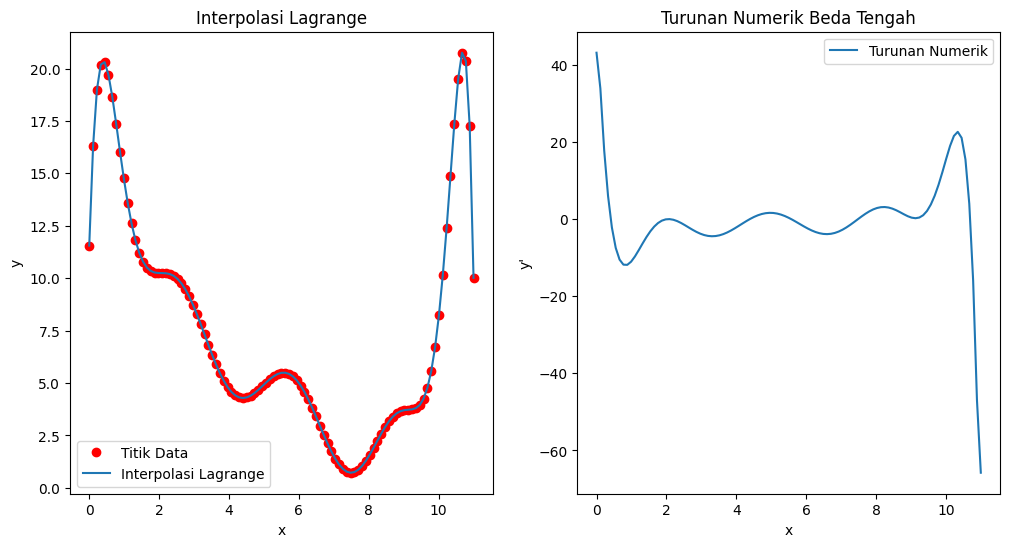

In [ ]:

x = np.array(x_interp)
y = np.array(y_interp)

# Ti

# Menghitung turunan numerik menggunakan beda tengah
h = x_interp[1] - x_interp[0]  # Asumsi langkah h yang sama
y_deriv = TurunanBedaTengah(x_interp, y_interp, h) #theta aksen

# Plotting
plt.figure(figsize=(12, 6))

# Plot interpolasi
plt.subplot(1, 2, 1)
plt.plot(x, y, 'ro', label='Titik Data')
plt.plot(x_interp, y_interp, label='Interpolasi Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolasi Lagrange')

# Plot turunan
plt.subplot(1, 2, 2)
plt.plot(x_interp, y_deriv, label='Turunan Numerik')
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.title('Turunan Numerik Beda Tengah')

plt.show()


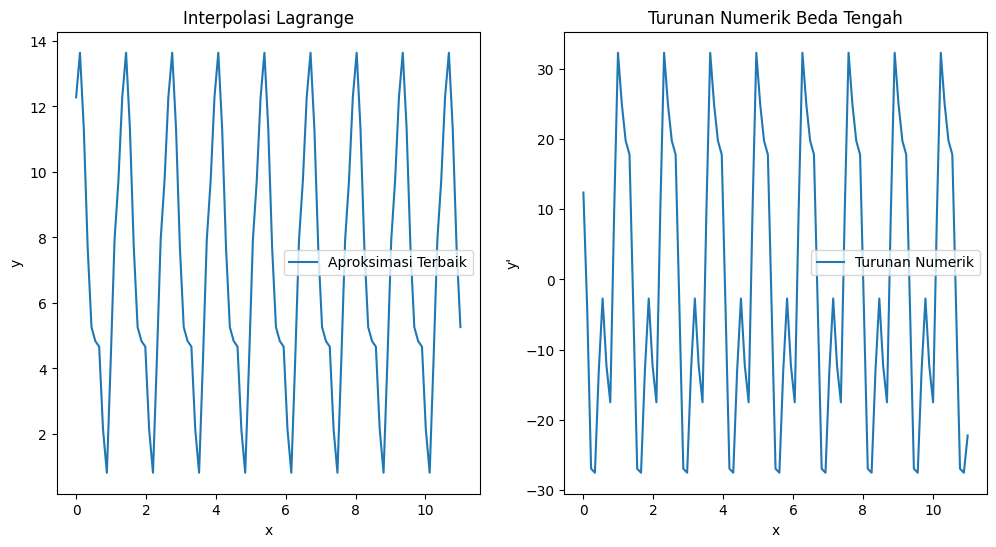

In [ ]:
x=np.linspace(0,11,101)
y=np.array([
    12.27564476, 13.63877422, 11.31985231, 7.706365769, 5.261224887,
    4.834428453, 4.664479264, 2.135588684, 0.814523763, 4.222131562,
    7.924075015, 9.722511317, 12.27564476, 13.63877422, 11.31985231,
    7.706365769, 5.261224887, 4.834428453, 4.664479264, 2.135588684,
    0.814523763, 4.222131562, 7.924075015, 9.722511317, 12.27564476,
    13.63877422, 11.31985231, 7.706365769, 5.261224887, 4.834428453,
    4.664479264, 2.135588684, 0.814523763, 4.222131562, 7.924075015,
    9.722511317, 12.27564476, 13.63877422, 11.31985231, 7.706365769,
    5.261224887, 4.834428453, 4.664479264, 2.135588684, 0.814523763,
    4.222131562, 7.924075015, 9.722511317, 12.27564476, 13.63877422,
    11.31985231, 7.706365769, 5.261224887, 4.834428453, 4.664479264,
    2.135588684, 0.814523763, 4.222131562, 7.924075015, 9.722511317,
    12.27564476, 13.63877422, 11.31985231, 7.706365769, 5.261224887,
    4.834428453, 4.664479264, 2.135588684, 0.814523763, 4.222131562,
    7.924075015, 9.722511317, 12.27564476, 13.63877422, 11.31985231,
    7.706365769, 5.261224887, 4.834428453, 4.664479264, 2.135588684,
    0.814523763, 4.222131562, 7.924075015, 9.722511317, 12.27564476,
    13.63877422, 11.31985231, 7.706365769, 5.261224887, 4.834428453,
    4.664479264, 2.135588684, 0.814523763, 4.222131562, 7.924075015,
    9.722511317, 12.27564476, 13.63877422, 11.31985231, 7.706365769,
    5.261224887
])



# Ti

# Menghitung turunan numerik menggunakan beda tengah
h = x_interp[1] - x_interp[0]  # Asumsi langkah h yang sama
y_deriv = TurunanBedaTengah(x,y, h) #theta aksen

# Plotting
plt.figure(figsize=(12, 6))

# Plot interpolasi
plt.subplot(1, 2, 1)

plt.plot(x, y, label='Aproksimasi Terbaik')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolasi Lagrange')

# Plot turunan
plt.subplot(1, 2, 2)
plt.plot(x,y_deriv, label='Turunan Numerik')
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.title('Turunan Numerik Beda Tengah')

plt.show()



In [ ]:
theta=np.array(y_interp)
theta_aksen=np.array(y_deriv)
print(theta)#sebanyak Nt+1
print(theta_aksen)#Sebanyak Nt+1
print(theta.shape)
print(theta_aksen.shape)

[11.55484701 16.29148829 18.99423831 20.18699621 20.30393945 19.69809873
 18.65013365 17.37708646 16.04093073 14.75676789 13.6005562  12.61628574
 11.822538   11.21839073 10.78864837 10.50839458 10.3468778  10.27075242
 10.24670798 10.2435263  10.23361266 10.19405134 10.10723858  9.96114781
  9.74928204  9.47036786  9.1278439   8.72919394  8.28517222  7.80896475
  7.31532624  6.81972827  6.33754938  5.88333333  5.4701367   5.10898243
  4.808431    4.5742767   4.40937166  4.31357668  4.28383387  4.31435293
  4.39689953  4.52117229  4.67525216  4.84610661  5.02013008  5.183701
  5.3237361   5.42822248  5.48670917  5.49074101  5.43421916  5.3136752
  5.12844764  4.88075304  4.57564674  4.22087157  3.82659675  3.40505247
  2.97006952  2.53653719  2.11979587  1.73498445  1.3963656   1.11665468
  0.90638023  0.77330565  0.72194245  0.75318544  0.86409952  1.0478852
  1.29404711  1.58878476  1.91561856  2.25625623  2.59169466  2.90354055
  3.17551898  3.39512222  3.55533251  3.65632993  3.707

In [ ]:
theta=np.array(y)
theta_aksen=np.array(y_deriv)
print(theta)#sebanyak Nt+1
print(theta_aksen)#Sebanyak Nt+1
print(theta.shape)
print(theta_aksen.shape)

[12.27564476 13.63877422 11.31985231  7.70636577  5.26122489  4.83442845
  4.66447926  2.13558868  0.81452376  4.22213156  7.92407501  9.72251132
 12.27564476 13.63877422 11.31985231  7.70636577  5.26122489  4.83442845
  4.66447926  2.13558868  0.81452376  4.22213156  7.92407501  9.72251132
 12.27564476 13.63877422 11.31985231  7.70636577  5.26122489  4.83442845
  4.66447926  2.13558868  0.81452376  4.22213156  7.92407501  9.72251132
 12.27564476 13.63877422 11.31985231  7.70636577  5.26122489  4.83442845
  4.66447926  2.13558868  0.81452376  4.22213156  7.92407501  9.72251132
 12.27564476 13.63877422 11.31985231  7.70636577  5.26122489  4.83442845
  4.66447926  2.13558868  0.81452376  4.22213156  7.92407501  9.72251132
 12.27564476 13.63877422 11.31985231  7.70636577  5.26122489  4.83442845
  4.66447926  2.13558868  0.81452376  4.22213156  7.92407501  9.72251132
 12.27564476 13.63877422 11.31985231  7.70636577  5.26122489  4.83442845
  4.66447926  2.13558868  0.81452376  4.22213156  7

In [ ]:
import numpy as np
def ffunction(xmin, xmax, xdas, Nx):
    dx = (xmax - xmin) / Nx
    f = np.zeros(Nx + 1)
    for j in range(Nx + 1):
        f[j] = xmin + j * dx - xdas
    return f
f = ffunction(0, 200, 7.0433, 101)
print(f)#Sebanyak Nx+1

[ -7.0433      -5.06310198  -3.08290396  -1.10270594   0.87749208
   2.8576901    4.83788812   6.81808614   8.79828416  10.77848218
  12.7586802   14.73887822  16.71907624  18.69927426  20.67947228
  22.6596703   24.63986832  26.62006634  28.60026436  30.58046238
  32.5606604   34.54085842  36.52105644  38.50125446  40.48145248
  42.4616505   44.44184851  46.42204653  48.40224455  50.38244257
  52.36264059  54.34283861  56.32303663  58.30323465  60.28343267
  62.26363069  64.24382871  66.22402673  68.20422475  70.18442277
  72.16462079  74.14481881  76.12501683  78.10521485  80.08541287
  82.06561089  84.04580891  86.02600693  88.00620495  89.98640297
  91.96660099  93.94679901  95.92699703  97.90719505  99.88739307
 101.86759109 103.84778911 105.82798713 107.80818515 109.78838317
 111.76858119 113.74877921 115.72897723 117.70917525 119.68937327
 121.66957129 123.64976931 125.62996733 127.61016535 129.59036337
 131.57056139 133.55075941 135.53095743 137.51115545 139.49135347
 141.47155

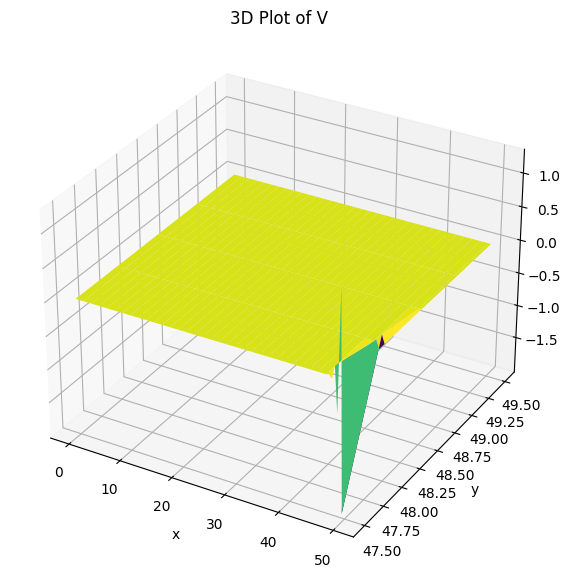

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure theta dan theta aksen seukuran Nt+1 dan f seukuran Nx+1
def WeatherDerivative(theta, theta_aksen, f, r, sigma, alpha, K, tick, xmin, xmax, xdas, ymin, tau0, tauf, Nx, Ny, Nt):
    T = tauf - tau0
    ymax = T * (xdas + xmin)
    dx = (xmax - xmin) / Nx
    dy = (ymax - ymin) / Ny
    dtau = T / Nt
    V = np.zeros((Nx + 1, Ny + 1, Nt + 1))

    # Initial Condition
    for j in range(Nx + 1):
        for k in range(Ny + 1):
            V[j, k, 0] = tick * max(ymin + k * dy - K, 0)

    Vymaxall = np.zeros((Nt + 1, Nx + 1))

    # Boundary Condition x
    for n in range(1, Nt + 1):
        gamma = np.zeros(Nx + 1)
        for j in range(Nx + 1):
            xj = xmin + j * dx
            idxtheta = min(n, len(theta) - 1)
            gamma[j] = alpha * (theta[idxtheta] - xj) - theta_aksen[min(n, len(theta_aksen) - 1)]

        for k in range(Ny + 1):
            V[0, k, n] = 0
            y_k = ymin + k * dy
            V[Nx, k, n] = tick * max(y_k - K * np.exp(-r * n * dtau), 0)

        for j in range(Nx + 1):
            V[j, Ny, n] = tick * max(ymax - K * np.exp(-r * n * dtau), 0)

        Vymaxall[n, :] = V[:, Ny, n]

        # Beda Hingga Eksplisit
        for j in range(1, Nx):
            for k in range(1, Ny):
                dyplus = V[j, k + 1, n - 1] - V[j, k, n - 1]
                d0x = V[j + 1, k, n - 1] - V[j - 1, k, n - 1]
                dx2 = V[j + 1, k, n - 1] - 2 * V[j, k, n - 1] + V[j - 1, k, n - 1]
                V[j, k, n] = V[j, k, n - 1] - r * dtau * V[j, k, n - 1] + (dtau / dy) * f[j] * dyplus + (gamma[j] * dtau / (dx)) * d0x + (((gamma[j] ** 2) * (dtau ** 2) / (2 * dx ** 2)) + (dtau * sigma ** 2) / (2 * dx ** 2)) * dx2

    return V
#  fungsi WeatherDerivative
V = WeatherDerivative(theta, theta_aksen, f, 0.06, 7.2286, 1.5834, 2.276586947, 5, 0, 200, 7.0433, 0, 1, 3, 100, 100, 100)
x = np.linspace(0, 50, 101)
y = np.linspace(0, 50, 101)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
Z = V[:, :, -1].T
ax.plot_surface(X[95:100],Y[95:100],Z[95:100], cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
plt.title('3D Plot of V')
plt.show()


In [ ]:
print(V[:,:,-1].shape)

TypeError: tuple indices must be integers or slices, not tuple

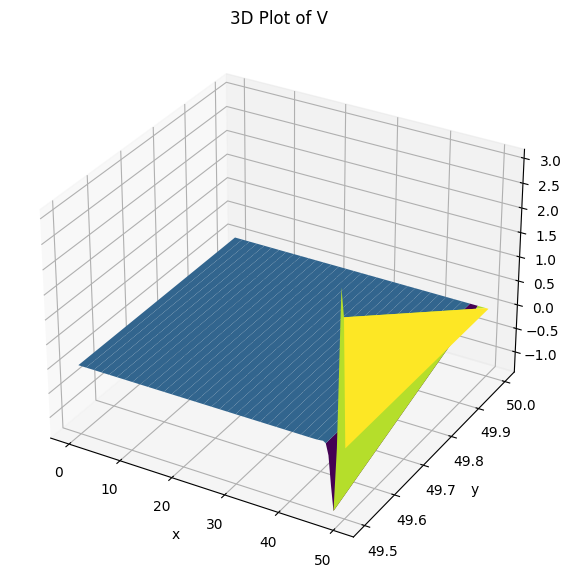

In [ ]:
r = 0.06
sigma = 0.2  # Contoh volatilitas yang lebih kecil
alpha = 1.0
K = 2.0
tick = 5
xmin = 0
xmax = 200
xdas = 7.0433
ymin = 0
tau0 = 0
tauf = 1
Nx = 100  # Ukuran grid x
Ny = 100  # Ukuran grid y
Nt = 200  # Langkah waktu yang lebih kecil untuk stabilitas

# Fungsi WeatherDerivative
V = WeatherDerivative(theta, theta_aksen, f, r, sigma, alpha, K, tick, xmin, xmax, xdas, ymin, tau0, tauf, Nx, Ny, Nt)
x = np.linspace(0,50, 101)
y = np.linspace(0,50, 101)
X, Y = np.meshgrid(x, y)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
Z = V[:, :, -1].T
ax.plot_surface(X[99:101], Y[99:101], Z[99:101], cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
plt.title('3D Plot of V')
plt.show()

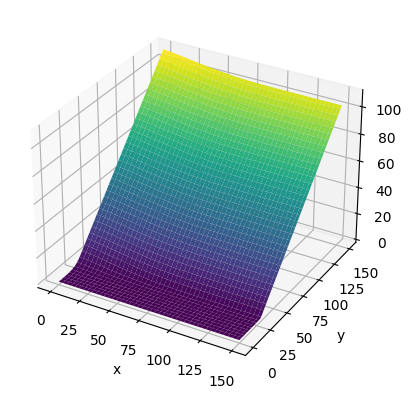

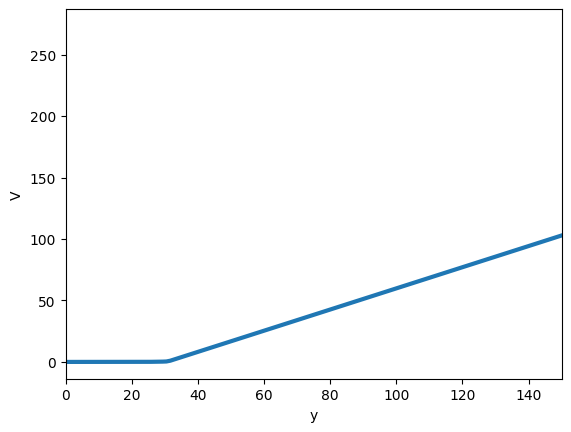

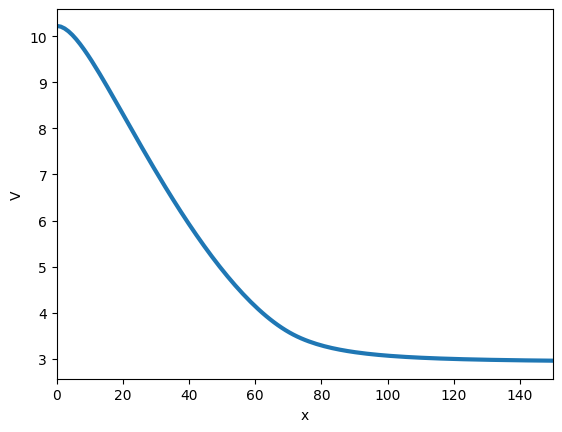

Time elapsed: 641.42 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def WeatherCallOptionPricing(x0, xf, xref, y0, yf, T0, T, K, r, lambda_, tick, sigma, kk, mm, alpha4, alpha5, alpha6, alpha7, theta5):
    # Initial settings
    Tf = T0 + T
    dx = (xf - x0) / (2**8)
    dy = dx
    dt = 10**-5

    # Grid parameters
    Nx = int((xf - x0) / dx)
    Ny = int((yf - y0) / dy)
    Nt = int((Tf - T0) / dt)

    x = np.linspace(x0, xf, Nx + 1)
    y = np.linspace(y0, yf, Ny + 1)
    t = np.linspace(T0, Tf, Nt + 1)

    Xi, Yi = np.meshgrid(x, y)

    # Functions needed for PDE
    fJ = xref - Xi

    # Initial solution
    Uinit = tick * np.maximum(0, Yi - K)

    # Boundary conditions
    Uinit[:Ny, Nx] = tick * np.maximum(0, Yi[:Ny, -1] - K)
    Uinit[Ny, :Nx] = tick * np.maximum(0, Yi[-1, :Nx] - K)

    # Time iteration of the numerical method
    start_time = time.time()

    for n in range(1, Nt + 1):
        # Function gamma(x,t)
        gama1 = mm + alpha4 * np.cos(2 * np.pi * (T + T0 - t[n - 1] - theta5) / 12) + \
                alpha5 * np.cos(4 * np.pi * (T + T0 - t[n - 1] - theta5) / 12) + \
                alpha6 * np.cos(6 * np.pi * (T + T0 - t[n - 1] - theta5) / 12) + \
                alpha7 * np.cos(8 * np.pi * (T + T0 - t[n - 1] - theta5) / 12)

        gama2 = -alpha4 * (2 * np.pi / 12) * np.sin(2 * np.pi * (T + T0 - t[n - 1] - theta5) / 12) - \
                -alpha5 * (4 * np.pi / 12) * np.sin(4 * np.pi * (T + T0 - t[n - 1] - theta5) / 12) - \
                -alpha6 * (6 * np.pi / 12) * np.sin(6 * np.pi * (T + T0 - t[n - 1] - theta5) / 12) - \
                -alpha7 * (8 * np.pi / 12) * np.sin(8 * np.pi * (T + T0 - t[n - 1] - theta5) / 12)

        gamaN = kk * (gama1 - Xi) - gama2 - lambda_ * sigma

        # Coefficients of the numerical method
        FL1 = (-dt) / (2 * dx) * gamaN + (sigma**2 * dt) / (2 * dx**2) + ((dt**2) / (2 * dx**2)) * gamaN**2
        FL3 = (dt) / (2 * dx) * gamaN + (sigma**2 * dt) / (2 * dx**2) + ((dt**2) / (2 * dx**2)) * gamaN**2
        Flambda4 = (dt) / (dy) * fJ * np.maximum(0, np.sign(fJ))
        FL6 = 1 - r * dt - (dt) / (dy) * fJ * np.maximum(0, np.sign(fJ)) - (sigma**2 * dt) / (dx**2) - ((dt**2) / (dx**2)) * gamaN**2

        un = Uinit.copy()
        unNx0 = un[1:Ny, 1]

        # Computing first node in x separately because of the Neumann condition
        Uinit[1:Ny, 0] = FL1[1:Ny, 0] * unNx0 + FL6[1:Ny, 0] * un[1:Ny, 0] + FL3[1:Ny, 0] * un[1:Ny, 1] + Flambda4[1:Ny, 0] * un[2:Ny+1, 0]

        # Computing all the other interior nodes
        Uinit[1:Ny, 1:Nx] = FL1[1:Ny, 1:Nx] * un[1:Ny, 0:Nx-1] + FL6[1:Ny, 1:Nx] * un[1:Ny, 1:Nx] + FL3[1:Ny, 1:Nx] * un[1:Ny, 2:Nx+1] + Flambda4[1:Ny, 1:Nx] * un[2:Ny+1, 1:Nx]

        # Boundary conditions
        Uinit[:Ny, Nx] = tick * np.maximum(0, Yi[:Ny, Nx] - K * np.exp(-r * (t[n] - T0)))
        Uinit[Ny, :Nx] = tick * np.maximum(0, Yi[Ny, :Nx] - K * np.exp(-r * (t[n] - T0)))

    time_elapsed = time.time() - start_time

    # Plot the results
    xx = x[:Nx // 2 + 1]
    yy = y[:Ny // 2 + 1]
    UinitU = Uinit[:Nx // 2 + 1, :Ny // 2 + 1]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(*np.meshgrid(xx, yy), UinitU, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('V')
    plt.show()

    plt.figure()
    plt.plot(y, Uinit[:, 100], linewidth=3)
    plt.xlabel('y')
    plt.ylabel('V')
    plt.xlim([0, 150])
    plt.show()

    plt.figure()
    plt.plot(x, Uinit[29, :], linewidth=3)
    plt.xlabel('x')
    plt.ylabel('V')
    plt.xlim([0, 150])
    plt.show()

    return Uinit, time_elapsed

# Define the parameters
x0 = 0
xf = 300
xref = 71
y0 = 0
yf = 300
T0 = 1
T = 2
K = 31
r = 0.05
lambda_ = 0
tick = 1
sigma = 72.6
kk = 2.8
mm = 71.0
alpha4 = 68.93715
alpha5 = 13.77723
alpha6 = -0.65968
alpha7 = 2.11344
theta5 = 0.93973

# Run the function
Uinit, time_elapsed = WeatherCallOptionPricing(x0, xf, xref, y0, yf, T0, T, K, r, lambda_, tick, sigma, kk, mm, alpha4, alpha5, alpha6, alpha7, theta5)

print(f"Time elapsed: {time_elapsed:.2f} seconds")
